## 1 Data Preprocessing & Cleaning

In [122]:
# Import the needed libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [123]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [124]:
# Adding the target to the DataFrame
X['target'] = y

# Save Data into CSV file 
X.to_csv('../data/heart_disease.csv', index=False)



In [125]:
# 1. Load the Heart Disease UCI dataset into a Pandas DataFrame. 
df = pd.read_csv('../data/heart_disease.csv')

print('\nDataFrame info:')
df.info()

print(f'\nSummary Statistics: \n: {df.describe()}')
df.dropna()
# Split Data to features and tagret
X = df.drop('target', axis=1)
y = df['target']

# convert Tagret Values to 1 Zero for Diagnosis of Heart Deisease
# (the predicted attribute) diagnosis of heart disease (angiographic disease status)
    #    -- Value 0: < 50% diameter narrowing
    #   -- Value 1: > 50% diameter narrowing
y = [1 if y[i] > 0 else 0 for i in range(len(y))]
y = pd.DataFrame(y, columns=['target'])
y



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB

Summary Statistics: 
:               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.43894

,target
0,0
1,1
2,1
3,0
4,0
...,...
298,1
299,1
300,1
301,1


In [126]:
# 2. Handle missing values (imputation or removal). 
# Inspecting the missing values
df.isnull().sum()

# Create a condition to collect the indices of the null values

null_rows = X.isnull().any(axis=1)

row_indices = X[null_rows].index.tolist()

In [127]:
# Removing the missing data rows from the data frame
df_dropped = df.dropna()
df_dropped

# Creating a new targeted DataFrame 
y_dropped = y.drop(row_indices)
y_dropped


,target
0,0
1,1
2,1
3,0
4,0
...,...
297,1
298,1
299,1
300,1


In [129]:
# Hot Encoding the categorical variables
df_encoded = pd.get_dummies(df_dropped, columns=['sex', 'cp', 'restecg', 'slope', 'fbs','exang','thal'])
df_encoded

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0,sex_1,cp_1,...,slope_1,slope_2,slope_3,fbs_0,fbs_1,exang_0,exang_1,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0.0,0,False,True,True,...,False,False,True,False,True,True,False,False,True,False
1,67,160,286,108,1.5,3.0,2,False,True,False,...,False,True,False,True,False,False,True,True,False,False
2,67,120,229,129,2.6,2.0,1,False,True,False,...,False,True,False,True,False,False,True,False,False,True
3,37,130,250,187,3.5,0.0,0,False,True,False,...,False,False,True,True,False,True,False,True,False,False
4,41,130,204,172,1.4,0.0,0,True,False,False,...,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,140,241,123,0.2,0.0,1,True,False,False,...,False,True,False,True,False,False,True,False,False,True
298,45,110,264,132,1.2,0.0,1,False,True,True,...,False,True,False,True,False,True,False,False,False,True
299,68,144,193,141,3.4,2.0,2,False,True,False,...,False,True,False,False,True,True,False,False,False,True
300,57,130,131,115,1.2,1.0,3,False,True,False,...,False,True,False,True,False,False,True,False,False,True


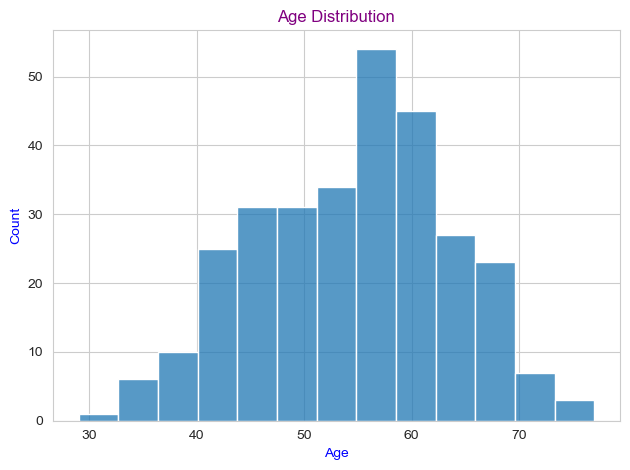

In [130]:
# Conduct Exploratory Data Analysis (EDA) 
# plot a Histogram to see the age range of the data set 

sns.histplot(df_encoded['age'])
plt.title('Age Distribution', color='purple' )
plt.xlabel('Age', color='blue')
plt.ylabel('Count', color='blue')
plt.tight_layout()
plt.grid(True)
plt.show()

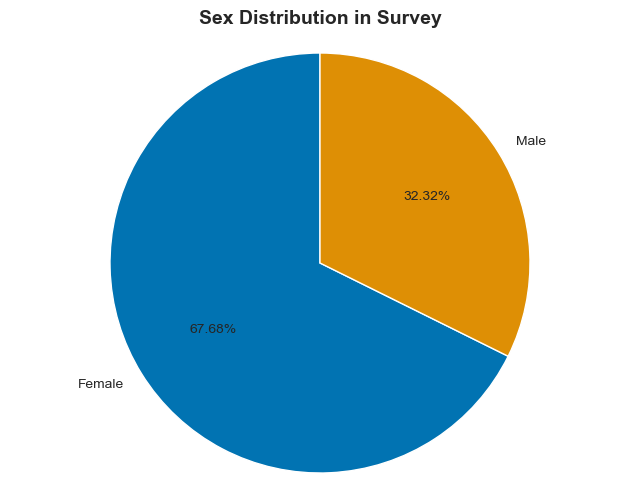

In [131]:
# Create a Pie Chart plot to see the Sex Distribution of the survey
# Count the values
value_counts = df_dropped['sex'].value_counts()

plt.figure(figsize=(8, 6))  # Slightly larger for better readability
sns.set_style('whitegrid')

# Creating the Pie Chart 
plt.pie(value_counts.values, 
        labels=['Female','Male'],  # Use actual labels from data
        autopct='%1.2f%%',  # Correct percentage format
        colors=sns.color_palette("colorblind", len(value_counts)),  
        startangle=90,  # Start from top
        )  

plt.title('Sex Distribution in Survey', fontsize=14, fontweight='bold')
plt.axis('equal')  # Ensure circular pie
plt.show()

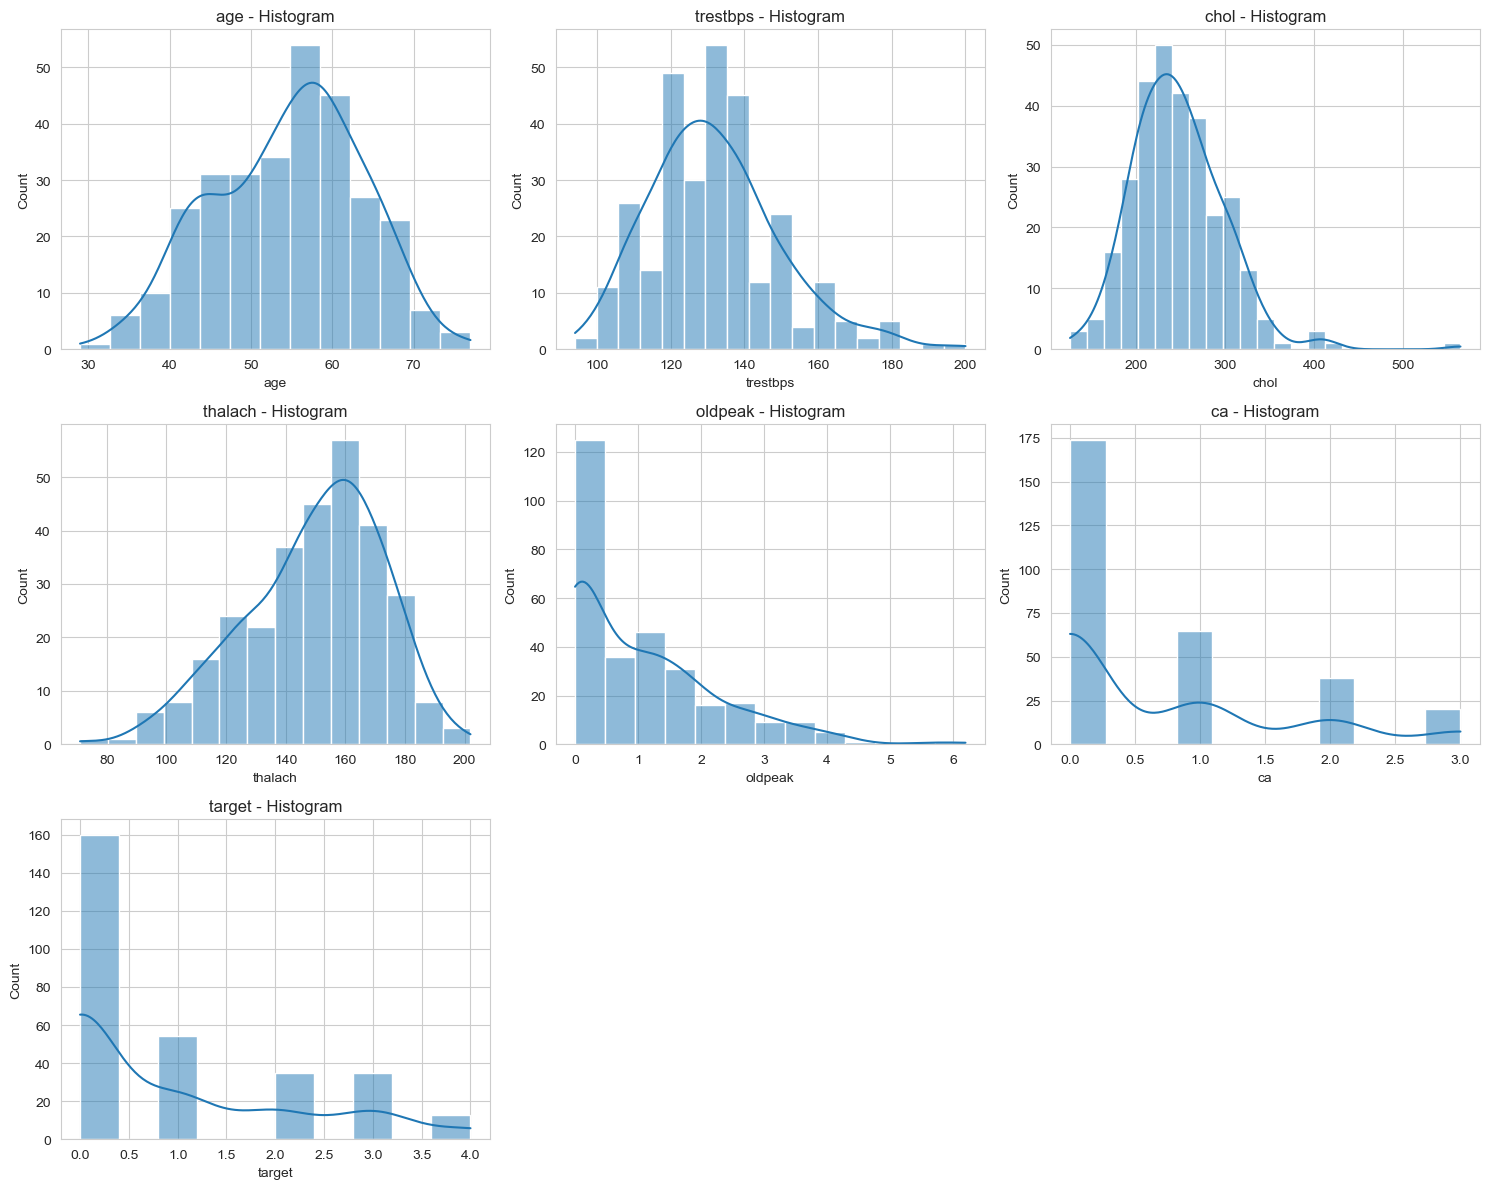

In [132]:

# Plot histograms for each numerical feature
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df_encoded[feature], kde=True)  
    plt.title(f'{feature} - Histogram')

plt.tight_layout()
plt.show()

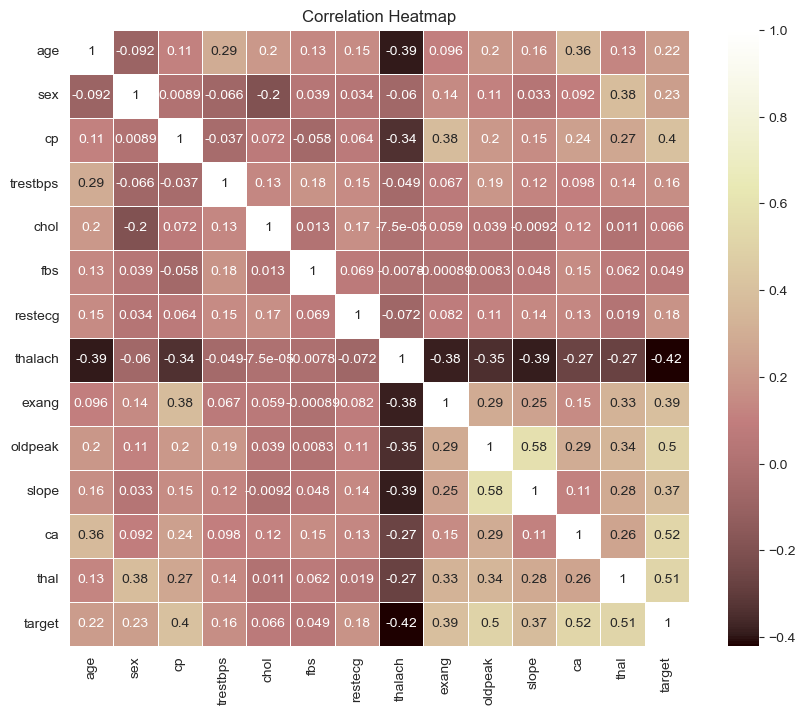

In [133]:
# Calculate the correlation matrix
correlation_matrix = df_dropped.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='pink', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [135]:
# Save the cleaned Dataframe into Csv file for later use:

df_encoded.drop('target', axis=1).to_csv('../data/cleaned_X.csv', index=False )
y_dropped.to_csv('../data/clean_y.csv', index=False)